<a href="https://colab.research.google.com/github/eumduryenog/eum/blob/main/201821018_eum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy

s = sympy.symbols('s')

G1 = 100/((s+2)*(s+3))

G4 = G1/(1+G1)

print(G4)

100/((1 + 100/((s + 2)*(s + 3)))*(s + 2)*(s + 3))


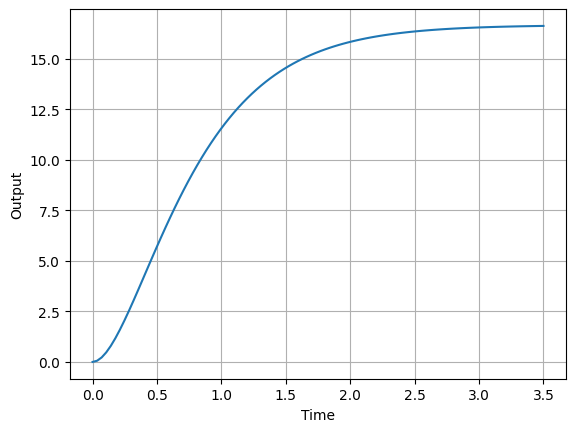

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

num = [100]
den = [1, 5, 6]  # (s+2)(s+3)의 계수

sys = signal.TransferFunction(num, den)  # 시스템 전달함수

t, y = signal.step(sys)  # unit step 입력에 대한 응답

plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid()
plt.show()

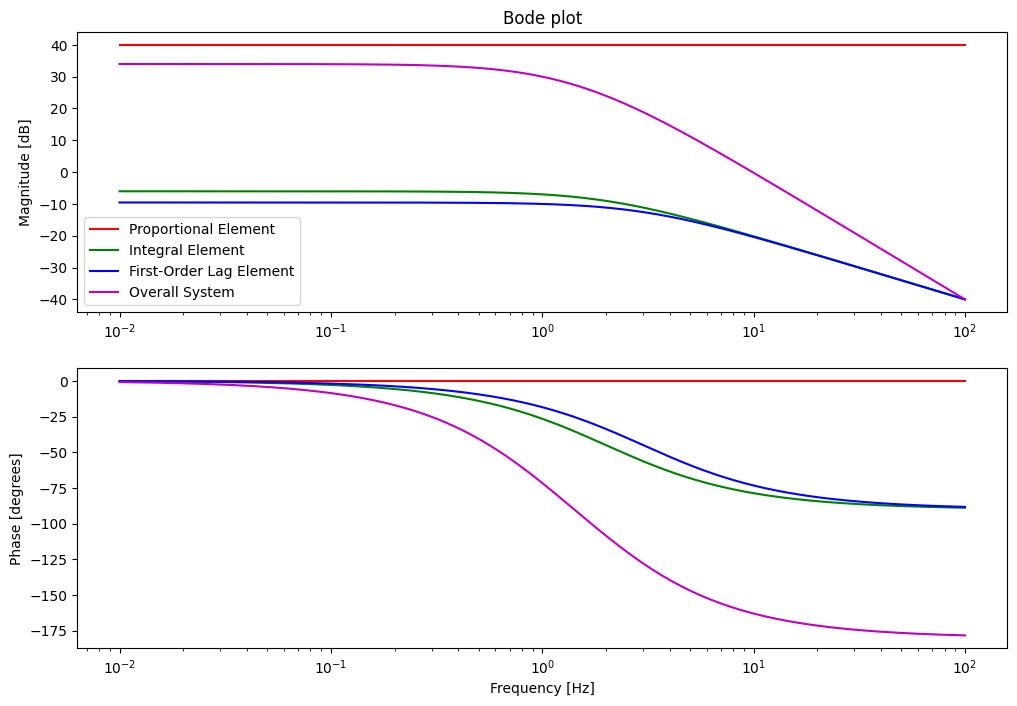

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

G0 = signal.lti([100], [1])
G1 = signal.lti([1], [1, 2])
G2 = signal.lti([1], [1, 3])
G3 = signal.lti([100], [1, 3, 2])

frequencies = np.logspace(-2, 2, 500)

systems = [G0, G1, G2, G3]
labels = ['Proportional Element', 'Integral Element', 'First-Order Lag Element', 'Overall System']
colors = ['r', 'g', 'b', 'm']

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for sys, label, color in zip(systems, labels, colors):
    _, mag, _ = sys.bode(w=frequencies)
    plt.semilogx(frequencies, mag, color=color, label=label)
plt.title('Bode plot')
plt.ylabel('Magnitude [dB]')
plt.legend()

plt.subplot(2, 1, 2)
for sys, label, color in zip(systems, labels, colors):
    _, _, phase = sys.bode(w=frequencies)
    plt.semilogx(frequencies, phase, color=color)
plt.ylabel('Phase [degrees]')
plt.xlabel('Frequency [Hz]')

plt.show()